# Baseball Case Study

Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
r2=r2_score
from sklearn.metrics import plot_roc_curve, auc

import warnings
warnings.filterwarnings('ignore')


Importing Data

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [122]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [123]:
df.shape

(30, 17)

Data contains - 30 rows and 17 coloumns

Will check null values in the dataframe

In [124]:
df.isnull().sum().sum()

0

Checking Duplicate Values

In [125]:
df.duplicated().sum()

0

Checking information of data

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All are numbers, some are integer and some are float, so datatype is correct

# Visualization

# Hist Plot

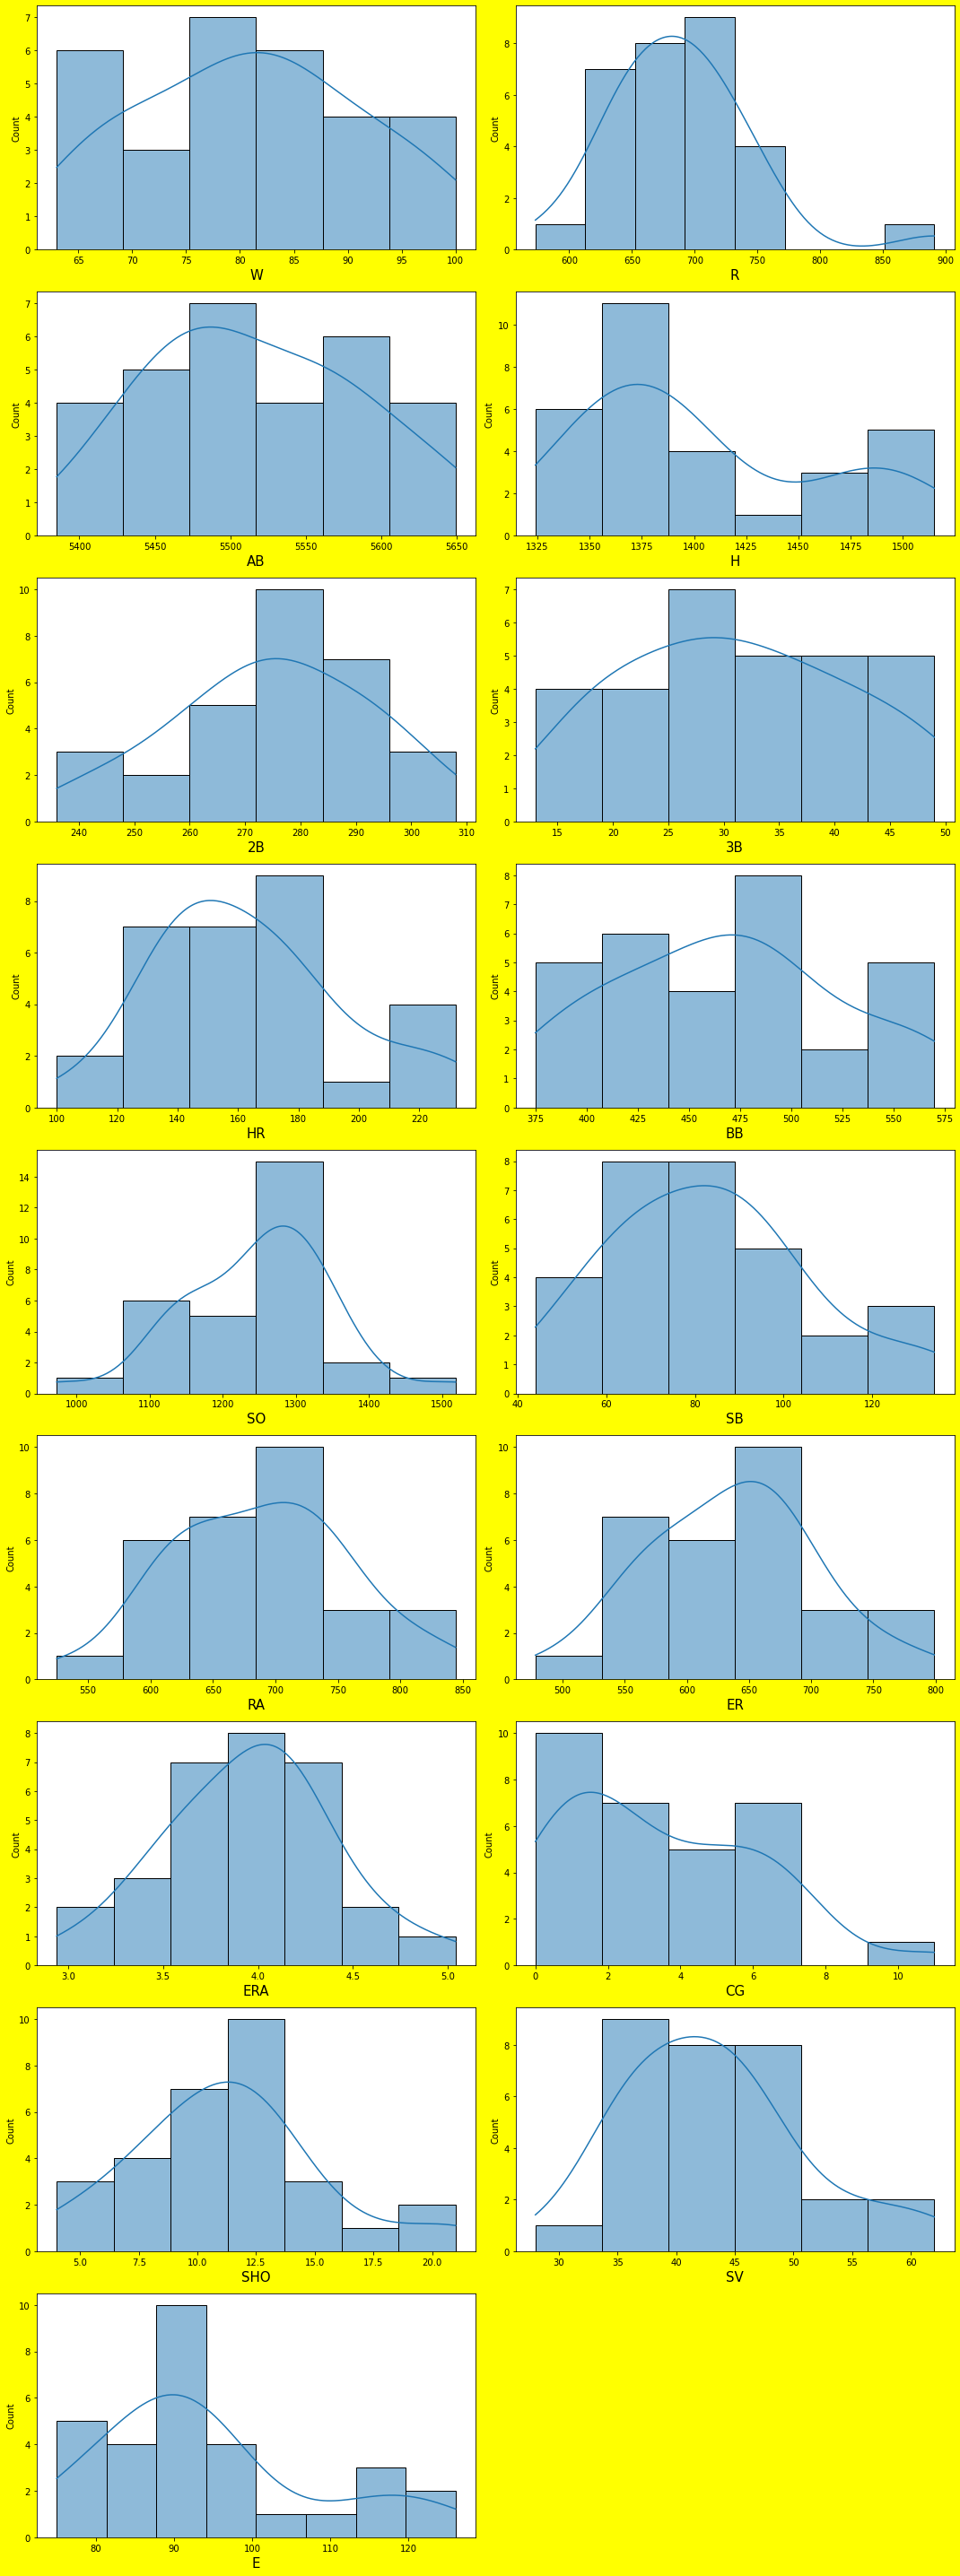

In [127]:
plt.figure(figsize=(15,40), facecolor='yellow')
plotnumber=1

for column in df:
    plt.subplot(9,2,plotnumber)
    sns.histplot(df[column], kde=True)
    #sns.distplot(df[column])
    plt.xlabel(column, fontsize=15)
    plotnumber += 1
    
plt.tight_layout()

# Regression Plot

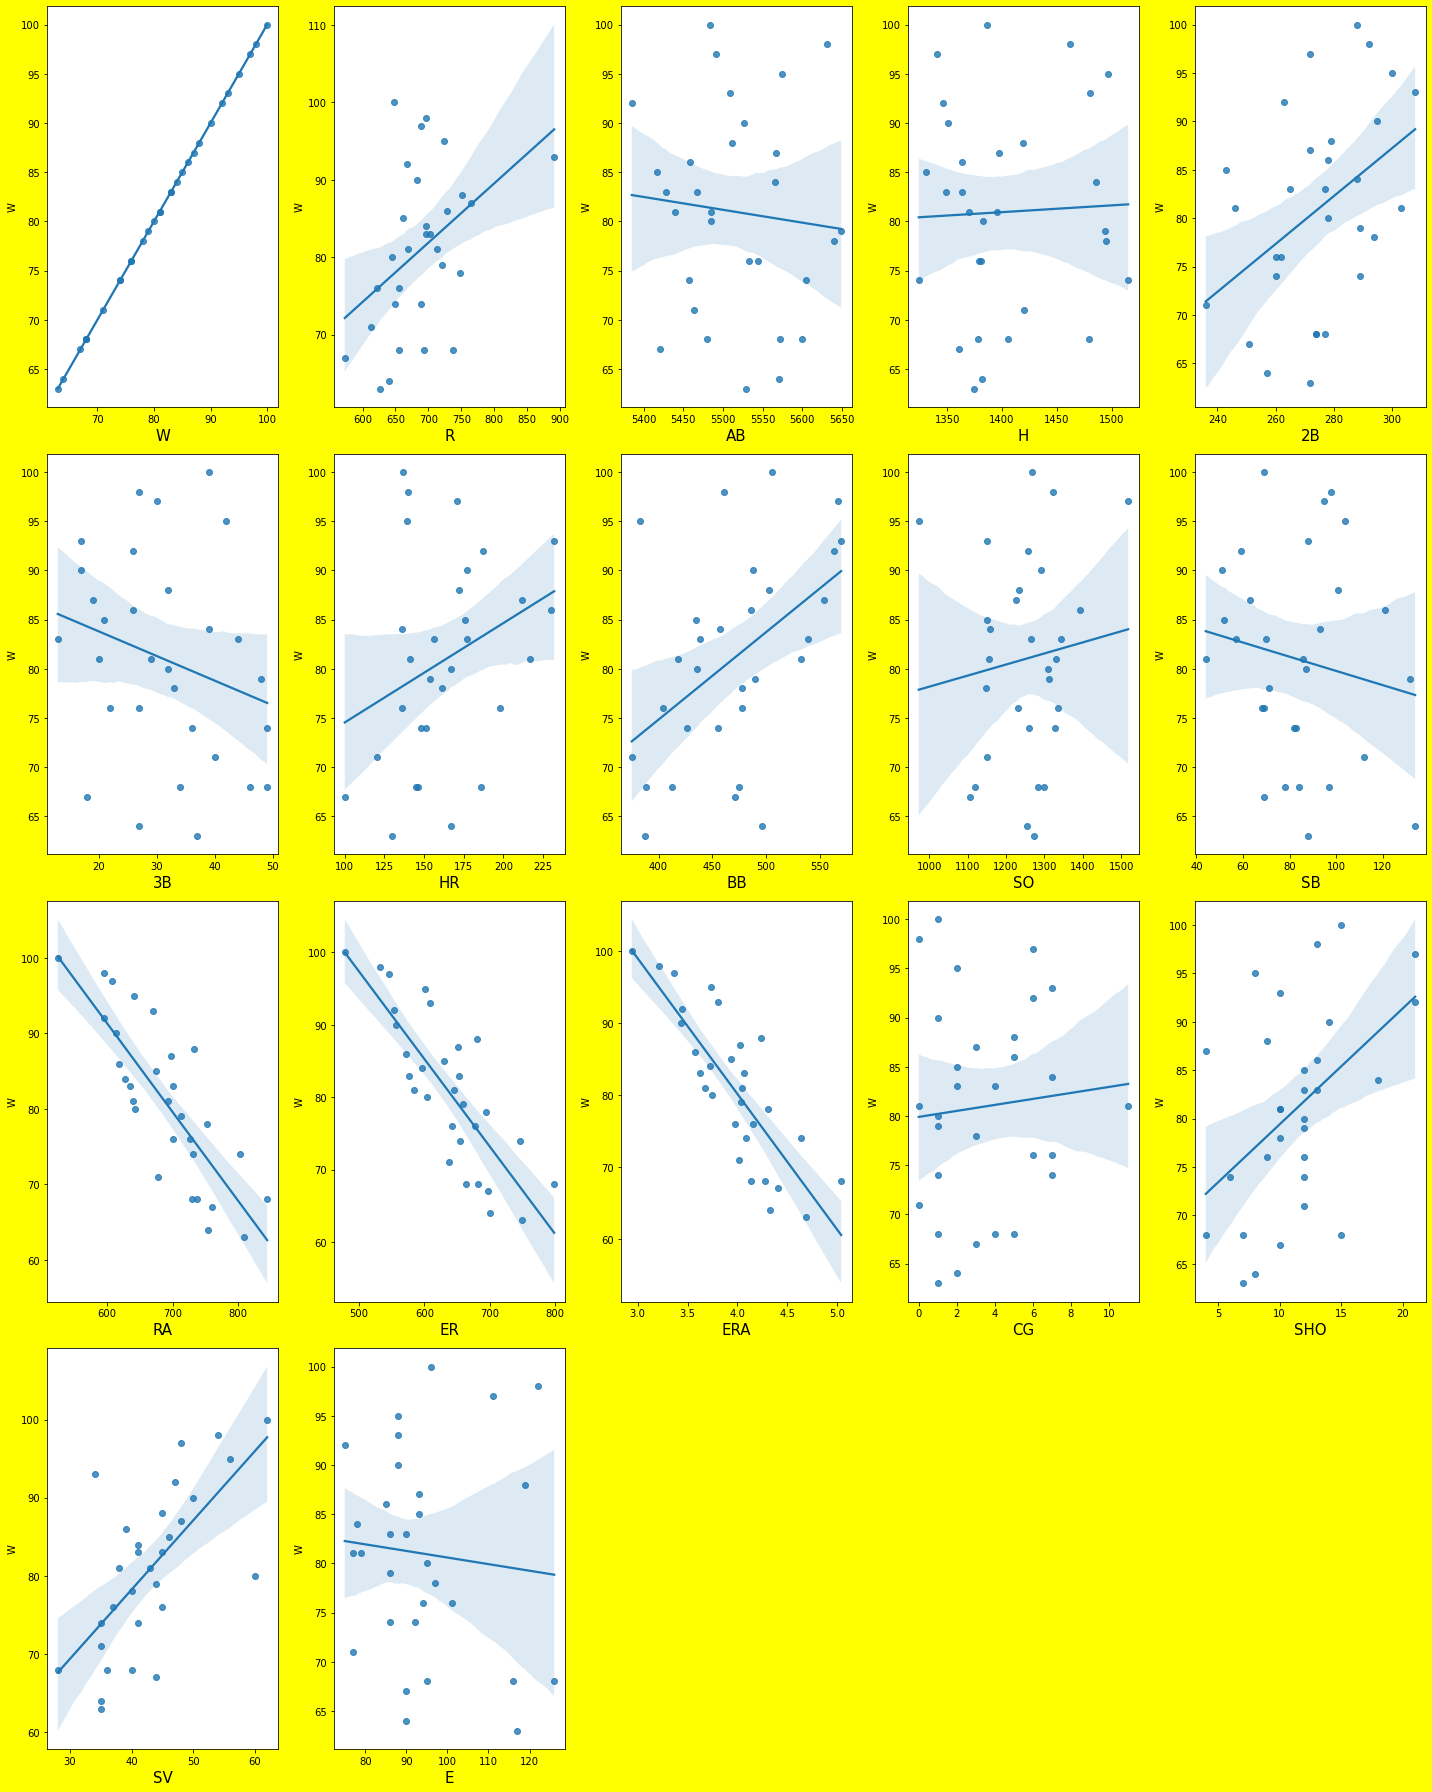

In [128]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber=1

for column in df:
    plt.subplot(4,5,plotnumber)
    sns.regplot(x=df[column], y="W", data=df)
    plt.xlabel(column, fontsize=15)
    plotnumber += 1
    
plt.tight_layout()

# Box Plot

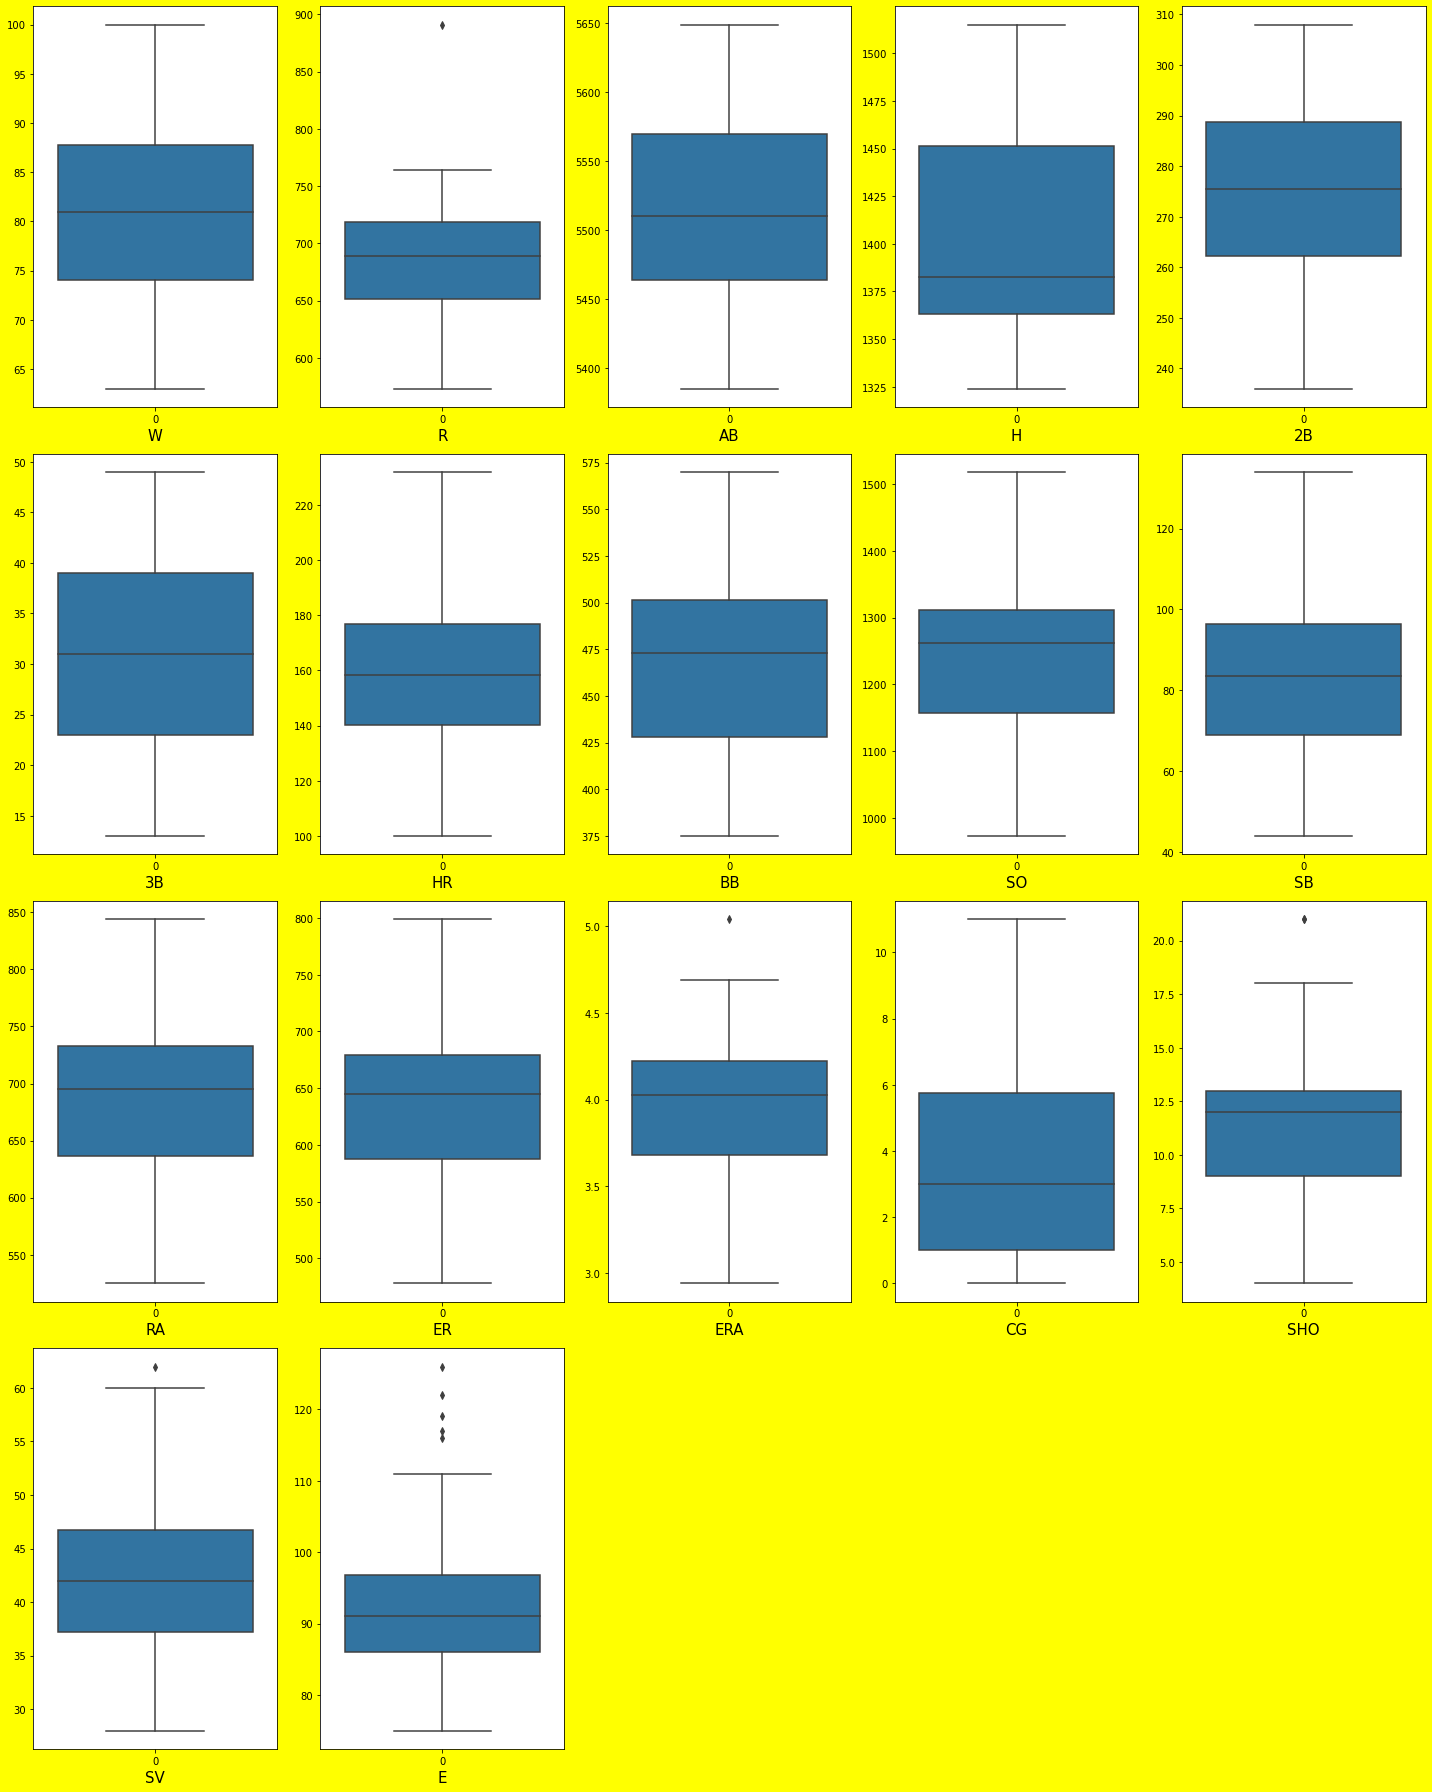

In [129]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber=1

for column in df:
    plt.subplot(4,5,plotnumber)
    sns.boxplot(data = df[column])
    plt.xlabel(column, fontsize=15)
    plotnumber += 1
    
plt.tight_layout()

1. Runs and Wins are linearly co related with outlier present in between 875 to 900.
2. At Balls and Wins have almost no relation with no outliers present. Win has almost constant value for every AB value.
3. At every Hit value win has almost constant value with no outliers.
4. Wins and Doubles are linearly related with each other, data is left skewed. No outliers are present.
5. Triples and wins are negative co-related and data is right skewed. No outliers are present.
6. Home runs are slightly positive co-related with runs and data is right skewed. No outliers are present.
7. Walks are corelated with wins with no outliers.
8. Strikeout in not corelated with wins having no outliers.
9. Stolen base is not related with wins having no outliers.
10. Runs Allowed are highly negative corelated with wins with no outliers.
11. Earned Runs are highly negative corelated with wins with no outliers.
12. Earned Runs Average are highly negative corelated with wins with outliers near about 50.
13. CH are not related with wins, data is right skewed.
14. Shutouts have outliers above 20. it is corelated and right skewed.
15. Saves have outliers above 60. corelated and slightly right skewed.
16. Earns has lot of outliers above 115. not corelated and right skewed.

# Conclusion

1. Runs, Doubles, home runs, Saves, Shutouts, and Walks are highly positively linearly correlated.
2. Stolen Bases, Runs Allowed, Earned Runs and Earned runs Average are highly negative linearly correlated.
3. We can say that rest features have no relation with label

Applying Power Transform to standardisation where standard scaling is default true

In [130]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [131]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

All the statistical Data Looks Good, We can proceed for Power Transformation to convert the data into Normal Distribution and remove skewness. In power transformation, Standard scaler is default True

In [132]:
from sklearn.preprocessing import power_transform

In [133]:
d = power_transform(df)

In [134]:
df = pd.DataFrame(d, columns = df.columns)

In [135]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.346947,0.728218,0.858727,4.996004e-16,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.497425,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.218658,0.261212,-0.701451,-3.053113e-16,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,0.257974,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,0.025271,-0.244821,-1.126097,0.000000e+00,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,-0.746906,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,-0.465574,-1.285129,0.267369,-8.326673e-17,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,0.113575,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,-0.665017,0.135622,1.267645,5.828671e-16,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.582654,1.520959,1.220103,0.251775,-1.095010,-0.532211


Checking Correlation

In [136]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.465717,-0.092270,0.018258,0.433093,-0.247935,0.326265,0.478887,0.124063,-0.164478,-0.812840,-0.809025,-0.818894,0.063648,0.459124,0.665322,-0.101470
R,0.465717,1.000000,0.365846,0.457600,0.574011,-0.015497,0.696539,0.371344,0.021355,0.073634,-0.073207,-0.067942,-0.080371,0.241789,-0.075620,-0.043006,-0.002382
AB,-0.092270,0.365846,1.000000,0.736537,0.445409,0.427214,-0.028824,-0.131760,-0.102277,0.377779,0.316515,0.310161,0.256341,-0.063826,-0.201189,-0.143546,0.339076
H,0.018258,0.457600,0.736537,1.000000,0.569962,0.453708,-0.095482,-0.121247,-0.409348,0.445900,0.221851,0.251598,0.231124,0.123546,-0.152027,-0.170386,-0.020470
2B,0.433093,0.574011,0.445409,0.569962,1.000000,0.204475,0.076143,0.301392,-0.173551,0.236904,-0.228612,-0.245781,-0.263350,0.279284,0.066977,0.129807,0.097293
3B,-0.247935,-0.015497,0.427214,0.453708,0.204475,1.000000,-0.393924,-0.458272,-0.133889,0.508077,0.295742,0.322298,0.313272,-0.066691,-0.047706,-0.182646,0.102814
HR,0.326265,0.696539,-0.028824,-0.095482,0.076143,-0.393924,1.000000,0.417581,0.385912,-0.179200,-0.105691,-0.088189,-0.096858,0.194161,-0.027620,0.019674,-0.145955
BB,0.478887,0.371344,-0.131760,-0.121247,0.301392,-0.458272,0.417581,1.000000,0.238514,-0.107299,-0.413502,-0.450727,-0.458850,0.480102,0.405895,0.118506,-0.067006
SO,0.124063,0.021355,-0.102277,-0.409348,-0.173551,-0.133889,0.385912,0.238514,1.000000,0.017165,-0.141401,-0.174501,-0.192592,-0.095856,0.216663,0.173120,0.176769
SB,-0.164478,0.073634,0.377779,0.445900,0.236904,0.508077,-0.179200,-0.107299,0.017165,1.000000,0.144945,0.152631,0.136497,0.015024,-0.109000,-0.206638,0.117440


<AxesSubplot:>

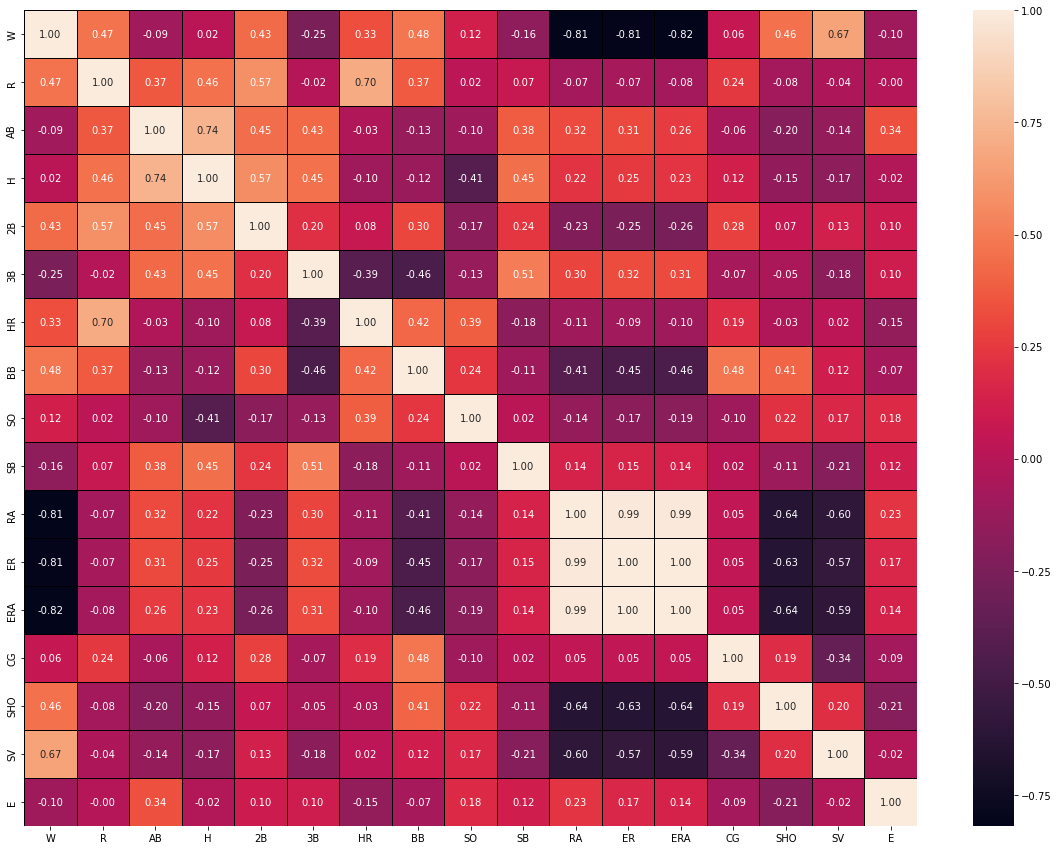

In [137]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor='black',fmt='0.2f')

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = variance_inflation_factor

In [139]:
v = df.drop('W',axis=1)

In [140]:
vif_data=pd.DataFrame()
vif_data['Feature']=v.columns

In [141]:
vif_data['VIF']=[variance_inflation_factor(v.values,i)
                    for i in range(len(v.columns))]
    
print(vif_data)

   Feature          VIF
0        R     8.442538
1       AB     9.296483
2        H     7.616434
3       2B     3.681503
4       3B     3.070618
5       HR     9.831437
6       BB     3.463897
7       SO     2.785373
8       SB     1.933634
9       RA   216.653929
10      ER  1936.282960
11     ERA  1273.931843
12      CG     2.454122
13     SHO     3.241519
14      SV     4.999084
15       E     1.793697


1.From the above, We can conclude that RA, ER and ERA are having very high VIF value, We can keep one from these 3 features

2.Also AB and H are also have same values of VIF, we will delete one feature out of this.

In [142]:
df=df.drop(columns=['RA','ER','AB'])

In [143]:
df = df.rename(columns = {0:'W', 1:'R', 2:'H',3:'2B',4:'3B',5:'HR',6:'BB',7:'SO',8:'SB',9:'ERA',10:'CG',11:'SHO',12:'SV',13:'E'})

In [144]:
df.head()

,W,R,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,1.346947,0.728218,4.996004e-16,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.218658,0.261212,-3.053113e-16,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,0.025271,-0.244821,0.000000e+00,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,-0.465574,-1.285129,-8.326673e-17,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,-0.665017,0.135622,5.828671e-16,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.520959,1.220103,0.251775,-1.095010,-0.532211


In [145]:
df.describe()

,W,R,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,-2.198242e-15,6.666250e-11,1.202742e-17,-5.074644e-16,-1.628327e-16,7.179442e-16,-2.479498e-15,-1.063964e-15,6.920390e-16,-1.302662e-15,4.107825e-16,5.477100e-16,6.339373e-15,3.949465e-12
std,1.017095e+00,1.017095e+00,3.222585e-16,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.797360e+00,-2.648512e+00,-4.996004e-16,-2.029345e+00,-1.966661e+00,-2.485131e+00,-1.779520e+00,-2.569896e+00,-2.102897e+00,-2.311585e+00,-1.729889e+00,-2.099326e+00,-2.473461e+00,-1.908427e+00
25%,-6.650169e-01,-6.119693e-01,-2.220446e-16,-7.297600e-01,-7.811404e-01,-7.176843e-01,-7.067027e-01,-8.965199e-01,-5.908464e-01,-6.082114e-01,-9.091805e-01,-5.107593e-01,-7.252384e-01,-5.322113e-01
50%,2.527078e-02,1.356222e-01,-8.326673e-17,-1.004692e-03,3.425508e-02,-7.558883e-02,1.164648e-01,1.101858e-01,1.018819e-01,1.613822e-01,6.463007e-02,2.517754e-01,-3.115649e-02,-6.412100e-02
75%,6.715771e-01,6.363778e-01,3.053113e-16,7.770392e-01,7.718724e-01,5.065887e-01,6.047005e-01,6.096915e-01,6.490052e-01,5.953974e-01,9.155165e-01,4.861603e-01,5.723372e-01,3.908498e-01
max,1.802315e+00,2.671903e+00,5.828671e-16,1.998506e+00,1.616444e+00,1.937860e+00,1.708067e+00,2.774844e+00,1.963116e+00,2.391324e+00,1.993513e+00,2.122859e+00,2.073674e+00,1.829127e+00


Checking any blank spaces present in the data

In [146]:
df.eq(' ').sum()

W      0
R      0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

All the statistical Data Looks Good, We can proceed for Power Transformation to convert the data into Normal Distribution

We will CHECK outliers in the data observed by using Z-Score method

In [147]:
from scipy.stats import zscore

In [148]:
(np.abs(zscore(df['R']))<3).all().all()

True

In [149]:
(np.abs(zscore(df['ERA']))<3).all().all()

True

In [150]:
(np.abs(zscore(df['SHO']))<3).all().all()

True

In [151]:
(np.abs(zscore(df['SV']))<3).all().all()

True

In [152]:
(np.abs(zscore(df['E']))<3).all().all()

True

From the above steps, we observed that we dosent have outliers and the data lies between the standard deviation value of 3

# Model Selection

We will use Cross Validation and on the basis of score, we will decide which model to train

In [165]:
x = df.drop('W' ,axis =1)
y = df['W']

print('features shape',x.shape,'\n' 'Label Shape',y.shape)

features shape (30, 13) 
Label Shape (30,)


In [167]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

Linear Regression

In [168]:
lr = LinearRegression()
lr_score = cross_val_score(lr, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
lr_score.mean()

-0.6809724296846343

Random Forest Regressor

In [169]:
rf = RandomForestRegressor()
rf_score = cross_val_score(rf, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
rf_score.mean()

-0.4152015450631112

Support Vector Regressor

In [170]:
svr=SVR()
svr_score = cross_val_score(svr, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
svr_score.mean()

-0.6657698929444368

Decision Tree Regressor

In [171]:
dt = DecisionTreeRegressor()
dt_score = cross_val_score(dt, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
dt_score.mean()

-0.7240504011300547

K Neighbors Regressor

In [172]:
knn = KNeighborsRegressor()
knn_score = cross_val_score(knn, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
knn_score.mean()

-0.5425794529885785

We observed minimum negative mean squared error for Random Forest Regressor, We will hypertune this model

In [178]:
gcv = GridSearchCV

In [193]:
params = {"n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
         }

In [195]:
hypt = gcv(rf, params, cv=7)

hypt.fit(x_train,y_train)

hypt.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 30}

We will now Train the Random Forest Model

# Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=30, min_samples_split=8, max_features= 'auto', bootstrap=True)

In [198]:
maxr2 = 0
maxRS = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70, random_state=i)
    rf.fit(x_train,y_train)
    y_pred_test = rf.predict(x_test)
    y_pred_train = rf.predict(x_train)
    scr_test=r2(y_test, y_pred_test)
    scr_train=r2(y_train, y_pred_train)
    #print('accuracy', acc, 'random state',i)
    
    
    if scr_test>maxr2:
        maxr2 = scr_test
        maxRS = i
print('Testing Max Score', maxr2, 'Max Random State', maxRS)


Testing Max Score 0.8984850313080894 Max Random State 163


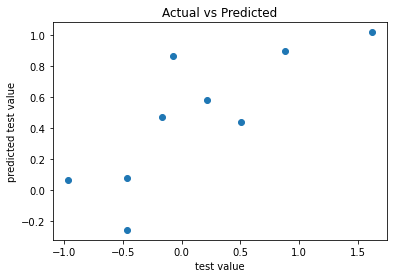

In [203]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('test value')
plt.ylabel('predicted test value')
plt.title("Actual vs Predicted")
plt.show()

test values are matching with predicted values at 89% score. 

# Model Evaluation

Testing errors

In [204]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [205]:
mean_absolute_error(y_test, y_pred_test)

0.48967948748883544

In [206]:
mean_squared_error(y_test, y_pred_test)

0.35438471891889506

In [208]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

0.5953022080581384

Training errors

In [210]:
mean_absolute_error(y_train, y_pred_train)

0.2535088853104766

In [211]:
mean_squared_error(y_train, y_pred_train)

0.08577051290649151

In [212]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

0.29286603235351744

# Regularization

In [213]:
from sklearn.linear_model import Lasso, LassoCV

In [220]:
lasscv = LassoCV(alphas=None, max_iter=99999, normalize=True)
a = lasscv.fit(x_train, y_train)
a

LassoCV(max_iter=99999, normalize=True)

In [221]:
alpha = a.alpha_
alpha

0.009649511684896724

In [222]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.009649511684896724)

In [223]:
lasso_reg.score(x_test, y_test)

0.5507695971144633

As we can see there is no need of regularization because Random Forest is giving good score and data is not overfitted, We will save random forest model

# Saving the Model

In [227]:
import pickle

In [228]:
pickle.dump('rf', open('Randomforest_model', 'wb'))